In [1]:
%matplotlib inline
from pyvista import set_plot_theme
set_plot_theme('document')

In [2]:
import gempy as gp
import gempy_viewer as gpv


Setting Backend To: AvailableBackends.numpy


In [5]:
data_path = 'https://raw.githubusercontent.com/cgre-aachen/gempy_data/master/'
path_to_data = data_path + "/data/input_data/jan_models/"



geo_model: gp.data.GeoModel = gp.create_geomodel(
    project_name='fold',
    extent=[6512290.17, 6512361.87, 5690041.29, 5690094.19, 114.85, 145.35],
    # resolution=[10, 10, 10],
    refinement=6,
    importer_helper=gp.data.ImporterHelper(
        path_to_orientations="D:\Programy experymentalne\BDI_model_3D\model2_orientations.csv",
        path_to_surface_points="D:\Programy experymentalne\BDI_model_3D\model2_surface_points.csv"
    )
)

section_dict = {
    'Przekroj_1': (
        [(6512305, 5690069), (6512322, 5690094), (6512361, 5690061)],(114, 145)
    )
}

gp.set_section_grid(
    geo_model.grid,
    section_dict
)


gp.map_stack_to_surfaces(
    gempy_model=geo_model,
    mapping_object={
        "Strat_Series": ("Cl1", 
                         "Cl2", 
                         "Cl4", 
                         "Gr3", 
                         "Hu", 
                         "orSa1b", 
                         "orSi2", 
                         "Pt", 
                         "Sa1a", 
                         "Sa1b", 
                         "Sa2", 
                         "Sa3", 
                         "Sa4b", 
                         "Sa5", 
                         "Sa6", 
                         "Si1", 
                         "Si2", 
                         "Si3", 
                         "Si4",
                         '\\N')  
    }
)

geo_model.structural_frame.structural_elements[0].color = "#00b0ef"
geo_model.structural_frame.structural_elements[1].color = "#00b0ef"
geo_model.structural_frame.structural_elements[2].color = "#00b0ef"
geo_model.structural_frame.structural_elements[3].color = "#fcffaf"
geo_model.structural_frame.structural_elements[4].color = "#a5d86c"
geo_model.structural_frame.structural_elements[5].color = "#a5d86c"
geo_model.structural_frame.structural_elements[6].color = "#a5d86c"
geo_model.structural_frame.structural_elements[7].color = "#a5d86c"
geo_model.structural_frame.structural_elements[8].color = "#fcffaf"
geo_model.structural_frame.structural_elements[9].color = "#fcffaf"
geo_model.structural_frame.structural_elements[10].color = "#fcffaf"
geo_model.structural_frame.structural_elements[11].color = "#fcffaf"
geo_model.structural_frame.structural_elements[12].color = "#fcffaf"
geo_model.structural_frame.structural_elements[13].color = "#fcffaf"
geo_model.structural_frame.structural_elements[14].color = "#fcffaf"
geo_model.structural_frame.structural_elements[15].color = "#e06e0a"
geo_model.structural_frame.structural_elements[16].color = "#e06e0a"
geo_model.structural_frame.structural_elements[17].color = "#e06e0a"
geo_model.structural_frame.structural_elements[18].color = "#e06e0a"
geo_model.structural_frame.structural_elements[19].color = "#ffffff"

print(geo_model.structural_frame.structural_elements)

# gp.compute_model(geo_model,
# engine_config=gp.data.GemPyEngineConfig(
# use_gpu=True
# ))

gp.compute_model(geo_model, solution_type="raw")
geo_data = geo_model

NameError: name 'calculate_line_coordinates_polyline' is not defined

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator


# --- rysowanie przekroju ---
p = gpv.plot_2d(
    geo_data,
    direction=['y'],
    show_data=True,
    legend=False,
    section_names=['Przekroj_1']
)

ax = p.axes[0]
fig = ax.figure

xmin, ymin, w, h = ax.dataLim.bounds
xmax = xmin + w
zmin = ax.dataLim.ymin
zmax = ax.dataLim.ymax

profile_length_m = xmax - xmin

# --- SKALE INŻYNIERSKIE ---
scale_h = 100   # 1:500 poziom
scale_v = 100  # 1:100 pion

left_mm, right_mm = 20, 20
bottom_mm, top_mm = 20, 20

print(profile_length_m)

sheet_width_mm = (profile_length_m * (1000 / scale_h))
sheet_height_mm = 297

left   = left_mm / (sheet_width_mm + left_mm + right_mm)
right  = right_mm / (sheet_width_mm + left_mm + right_mm)
bottom = bottom_mm / sheet_height_mm
top    = top_mm / sheet_height_mm

print(left)
print(right)
print(bottom)
print(top)


# --- ROZMIAR ARKUSZA (mm) ---
# sheet_width_mm = (profile_length_m * (1000 / scale_h)) + left_mm + right_mm
                                 # np. A3 / A1-rolka

fig.set_size_inches(
    (sheet_width_mm + left_mm + right_mm) / 25.4,
    (sheet_height_mm + bottom_mm + top_mm) / 25.4
)




width  = 1 - left - right
height = 1 - bottom - top

ax.set_position([left, bottom, width, height])

# --- POZIOM: CAŁY PROFIL (skala z szerokości kartki) ---
ax.set_xlim(xmin, xmax)

# --- PION: ZAKRES Z FIZYCZNEJ WYSOKOŚCI OSI ---
fig_height_in = fig.get_size_inches()[1]
axis_height_mm = fig_height_in * height * 25.4

y_range_m = (sheet_height_mm - bottom_mm - top_mm) / (1000 / scale_v)
z_center = (zmin + zmax) / 2

ax.set_ylim(z_center + y_range_m / 2,
            z_center - y_range_m / 2)

ax.set_aspect((scale_v / scale_h))

ax.invert_yaxis()

# --- TICKI ---
ax.xaxis.set_major_locator(MultipleLocator(50))
ax.xaxis.set_minor_locator(MultipleLocator(10))
ax.yaxis.set_major_locator(MultipleLocator(10))
ax.yaxis.set_minor_locator(MultipleLocator(1))

ax.tick_params(axis='both', which='major', length=8, width=1.2)
ax.tick_params(axis='both', which='minor', length=4, width=0.8)

# --- RAMKA ---
for spine in ax.spines.values():
    spine.set_linewidth(2.0)
    spine.set_visible(True)

# --- usuń colorbar ---
for a in fig.axes:
    if a is not ax:
        fig.delaxes(a)

# --- zapis ---
fig.savefig("przekroj_1_500_1_100.pdf", dpi=300)
plt.close(fig)


c:\Users\Uzytkownik\AppData\Local\Programs\Python\Python311\Lib\site-packages\gempy_viewer\API\_plot_2d_API.py:176: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  p.fig.show()


71.70000000018626
0.02642007926017277
0.02642007926017277
0.06734006734006734
0.06734006734006734


c:\Users\Uzytkownik\AppData\Local\Programs\Python\Python311\Lib\site-packages\pyvista\plotting\renderer.py:1972: PyVistaDeprecationWarning: `xlabel` is deprecated. Use `xtitle` instead.
  warnings.warn(
c:\Users\Uzytkownik\AppData\Local\Programs\Python\Python311\Lib\site-packages\pyvista\plotting\renderer.py:1978: PyVistaDeprecationWarning: `ylabel` is deprecated. Use `ytitle` instead.
  warnings.warn(
c:\Users\Uzytkownik\AppData\Local\Programs\Python\Python311\Lib\site-packages\pyvista\plotting\renderer.py:1984: PyVistaDeprecationWarning: `zlabel` is deprecated. Use `ztitle` instead.
  warnings.warn(
c:\Users\Uzytkownik\AppData\Local\Programs\Python\Python311\Lib\site-packages\pyvista\jupyter\notebook.py:56: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(
ERROR:root:Text is not set!
ERROR:root:Algorithm vtkVectorText (000001E6259008A0) returned failure for request: vtkInformation (000001E6285469D0)


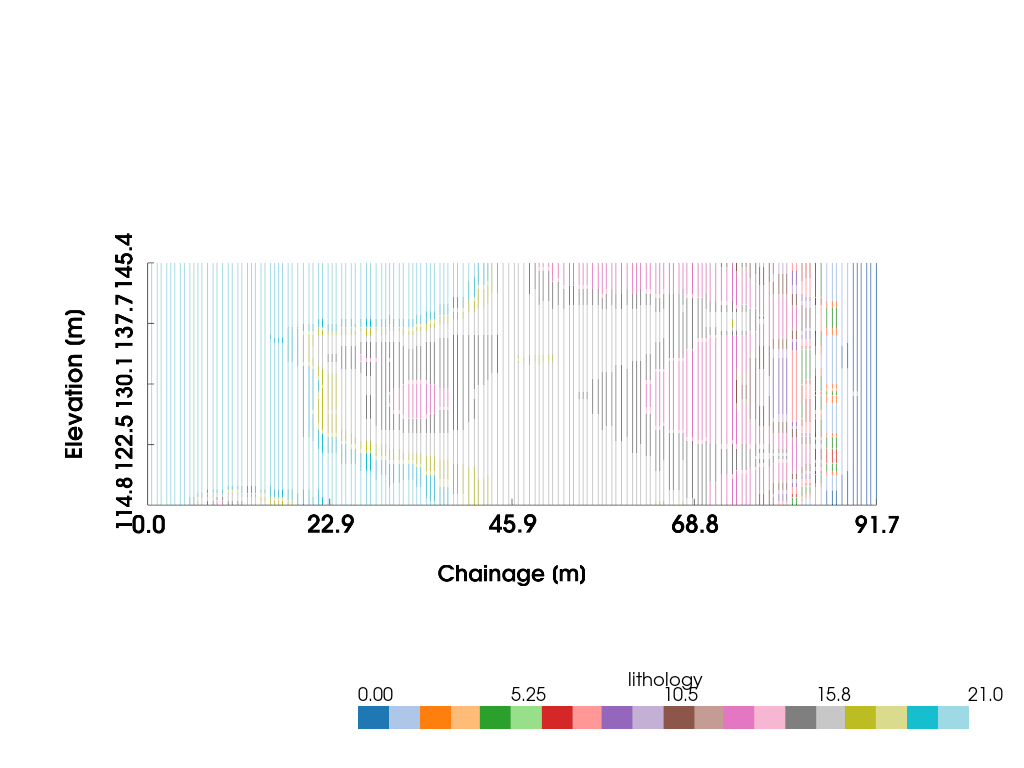

In [85]:
import numpy as np
import pyvista as pv

# --- RAW ARRAYS Z GEMPY ---
lith = geo_model.solutions.raw_arrays.lith_block
rg = geo_model.grid.regular_grid
nx, ny, nz = rg.resolution

xmin, xmax, ymin, ymax, zmin, zmax = rg.extent

# --- GRID PYVISTA ---
grid = pv.ImageData()
grid.dimensions = (nx + 1, ny + 1, nz + 1)
grid.origin = (xmin, ymin, zmin)
grid.spacing = (
    (xmax - xmin) / nx,
    (ymax - ymin) / ny,
    (zmax - zmin) / nz
)
grid.cell_data["lithology"] = lith.flatten(order="F")

# --- LINIA ŁAMANA ---
points = np.array([
    [6512305.38, 5690069.13, 0],
    [6512322.01, 5690094.19, 0],
    [6512361.87, 5690061.55, 0]
])

def densify(points, step=5.0):
    out = [points[0]]
    for i in range(len(points) - 1):
        p0, p1 = points[i], points[i + 1]
        dist = np.linalg.norm(p1[:2] - p0[:2])
        n = max(2, int(dist // step))
        for j in range(1, n):
            out.append(p0 + (p1 - p0) * j / n)
        out.append(p1)
    return np.array(out)

line = densify(points, step=0.5)

# --- CURTAIN SECTION ---
nz_section = 200
curtain = []

for p in line:
    col = grid.sample_over_line(
        [p[0], p[1], zmin],
        [p[0], p[1], zmax],
        resolution=nz_section
    )
    curtain.append(col)

section = curtain[0]
for c in curtain[1:]:
    section = section.merge(c)

# --- CHAINAGE (JEDYNA POPRAWNA WERSJA) ---
pts = section.points
n = pts.shape[0]

chainage = np.zeros(n)
for i in range(1, n):
    dx = pts[i, 0] - pts[i-1, 0]
    dy = pts[i, 1] - pts[i-1, 1]
    chainage[i] = chainage[i-1] + np.sqrt(dx*dx + dy*dy)

section.point_data["chainage"] = chainage

pts = section.points.copy()

pts[:, 0] = chainage      # X = kilometraż
pts[:, 1] = 0.0           # Y = płasko
# pts[:, 2] = Z zostaje

section.points = pts
pl = pv.Plotter()
pl.add_mesh(
    section,
    scalars="lithology",
    cmap="tab20",
    show_edges=False
)

pl.enable_parallel_projection()
pl.view_xz()
pl.show_bounds(
    xlabel="Chainage [m]",
    ylabel="",
    zlabel="Elevation [m]"
)

pl.show()
